<a href="https://colab.research.google.com/github/MaiMejia/ML-Projects/blob/main/CustomerSatisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>Delivery Services - Predicting Customer Satisfaction</b>

1.  <a href="#Context">Context</a>
2.  <a href="#Previewing the Dataset">Previewing the Dataset</a>
1.  <a href="#Exploratory Data Analysis">Exploratory Data Analysis</a>
    * <a href="#a) Univariate"> a) Univariate</a>
    * <a href="#b) Multivariate"> b) Multivariate</a>
2.  <a href="#Model Building">Model Building</a>
    *   <a href="#a) Train-Test Data"> a) Train-Test Data</a>
    *   <a href="#b) Selecting the Best Approach"> b) Selecting the Best Approach</a>
    * <a href="#c) Evaluating the model"> c) Evaluating the model</a>
    * <a href="#d) Improving the Selected Model"> d) Improving the Selected Model</a>
    * <a href="#e) Evaluating Predicted Values"> e) Evaluating Predicted Values</a>
    * <a href="#f) Saving Predicted Values"> f) Saving Predicted Values</a>
1.  <a href="#Final Remarks">Final Remarks</a>


<a name="Context"></a>
#### <b>1. Context</b>
----------------------------------------------------------------------
One of the fastest growing startups in the logistics and delivery domain has been struggling on keeping their customers happy with their services. After several attempts to understand areas of improvement, they keep facing challenges.<br>
Therefore, they have decided to leverage the ML & AI capabilities to gain a deep understanding of this persistent challenge. <br>

**Goal:** Predict wether customers are satisfied or dissatisfied with the delivery services.

**Data** <br>
Getting feedback from customers is not an easy task, but the company have tried to get constant customers feedback. The customers' input is crucial to gain deeper understanding of their operations across all levels. Therefore, they did a survey to a select customer cohort. <br>Here is a subset of this data.

**Data Description:** <br>
Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers<br>
X1 = my order was delivered on time<br>
X2 = contents of my order was as I expected<br>
X3 = I ordered everything I wanted to order<br>
X4 = I paid a good price for my order<br>
X5 = I am satisfied with my courier<br>
X6 = the app makes ordering easy for me<br>

 Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Installing libraries
!pip install hyperopt xgboost scikit-learn matplotlib seaborn scikit-learn

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model building libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel, f_classif
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/survey2020.csv')
data.head(5)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


<a name="Previewing the Dataset"></a>
#### <b> 2. Previewing the Dataset</b>
----------------------------------------------------------------------

In [ ]:
data.shape

(126, 7)

In [ ]:
data.info() # Check data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [ ]:
data.describe().round(0)  # Review the summary statistics to get a better understanding of the dataset.

,Y,X1,X2,X3,X4,X5,X6
count,126.0,126.0,126.0,126.0,126.0,126.0,126.0
mean,1.0,4.0,3.0,3.0,4.0,4.0,4.0
std,0.0,1.0,1.0,1.0,1.0,1.0,1.0
min,0.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,0.0,4.0,2.0,3.0,3.0,3.0,4.0
50%,1.0,5.0,3.0,3.0,4.0,4.0,4.0
75%,1.0,5.0,3.0,4.0,4.0,4.0,5.0
max,1.0,5.0,5.0,5.0,5.0,5.0,5.0


In [ ]:
data.isnull().sum()     # Verify if the dataset contains missing values.

,0
Y,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0


##### **Observations:**<br>
* The dataset contains seven columns (variables) and 126 records on each column.
* There are no null/missing values.
* The values of Y range between 0 and 1, and for X between 1 and 5, as it was expected.
* The mean of variables X2 and X3 is three, a point lower compared to the other X variables.



<a name="Exploratory Data Analysis"></a>
#### <b>3. Exploratory Data Analysis</b>
----------------------------------------------------------------------

<a name="a) Univariate"></a>
###### <b> a) Univariate:</b> Deep dive into single variables distribution, central tendency, and variability.

In [ ]:
# Counting Y labels to see if hey are balanced
data['Y'].value_counts()

,count
Y,
1,69
0,57


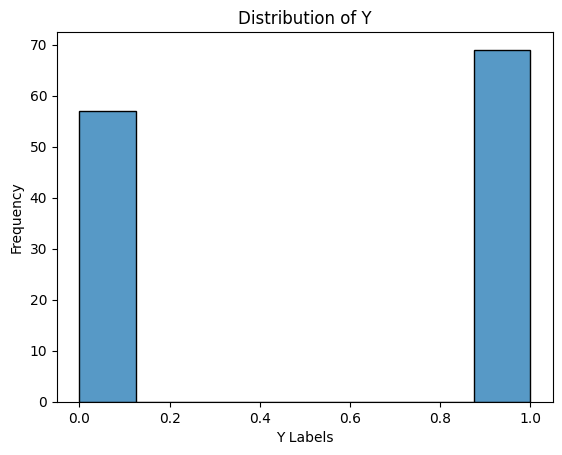

In [ ]:
# Getting a deeper understanding of the labels distribution

plt.plot(figsize=(3, 2))

sns.histplot(data, x=data['Y'])
plt.xlabel('Y Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Y')
plt.show()

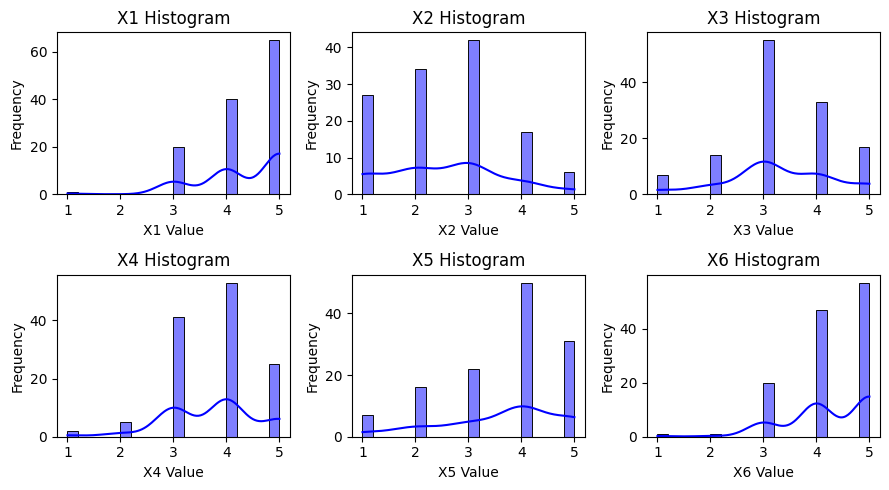

In [ ]:
# Inspecting X variables distribution
x_cols = ['X1','X2','X3','X4','X5','X6']

fig, axes = plt.subplots(2, 3, figsize=(9, 5))
axes = axes.flatten()

# Loop through the configurations and create each subplot dynamically
for idx, col_name in enumerate(x_cols):
    bins_val = 20
    kde_val = True
    plot_color = 'Blue'

    # Plot the histogram using seaborn on the current axis (axes[i])
    sns.histplot(data, x=col_name, bins=bins_val, kde=kde_val, ax=axes[idx], color=plot_color)

    # Set title and labels for the current subplot
    axes[idx].set_title(f'{col_name} Histogram')
    axes[idx].set_xlabel(f'{col_name} Value')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

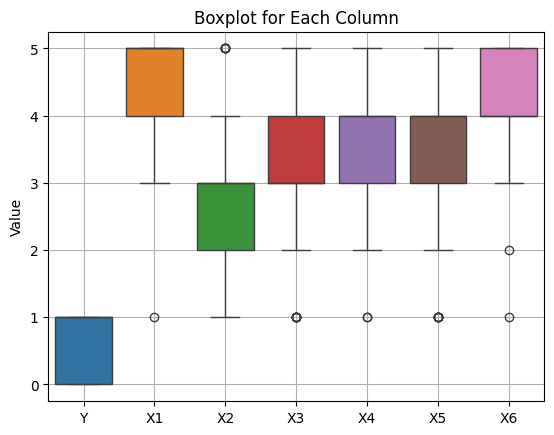

In [ ]:
# Generate boxplots for all columns
sns.boxplot(data)

# Display the plot
plt.title('Boxplot for Each Column')
plt.ylabel('Value')
plt.grid(True)
plt.show()

###### **Observations:**
1. Y labels are balanced, with 1 with 55% of labels and 0 with 45% of the labels.
2. The X variables are distribuited as follow:<br>
  **a)** Top rated questions were related to getting the delivery on time (X1) and the positive impact of using the app (X6), most of these questions were scored with 5 (Left-skewed distribution).<br>
  **b)** The second best rated services were the price paid for orders (X4) and satisfaction with the courier (X5), the majority of these questions were scored with 4.<br>
  **c)** Finally, the rate of receive the expected content (X2) and order what they want (X3) fell in the lowest score among all questions, 3.<br>

<a name="b) Multivariate"></a>
###### <b>b) Multivariate</b>       

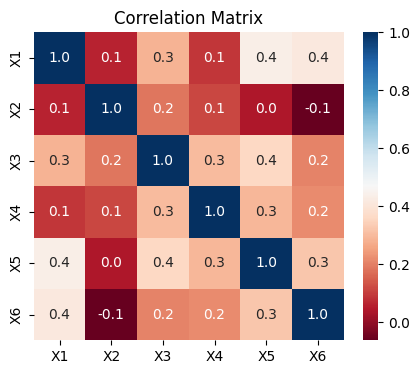

In [ ]:
# Correlaction Matrix helps us to investigate variables' relationships.

plt.figure(figsize=(5, 4))
sns.heatmap(data[x_cols].corr(), annot=True, fmt='.1f', cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

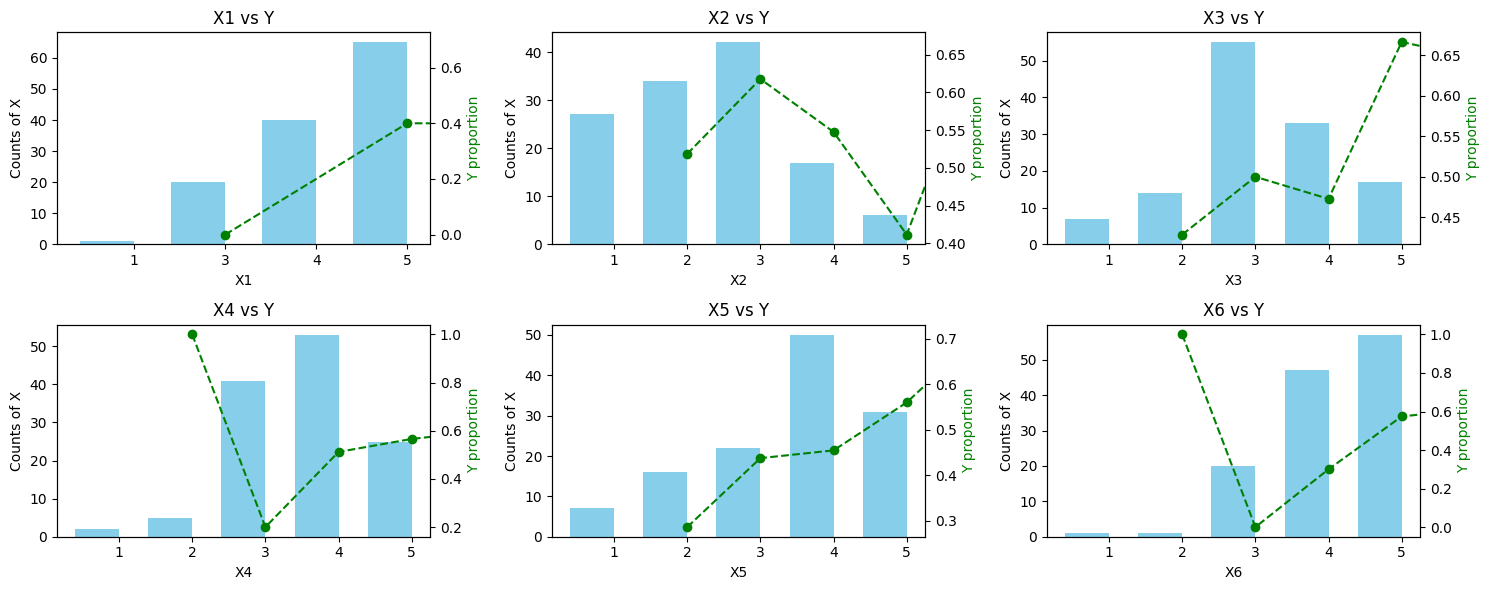

In [ ]:
## Plotting X variables vs Y

# Defining variables
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
y_col = data.columns[0]
X_cols = X.columns.tolist()

def plot_x_vs_y(data, X_cols, y_col):
    n_cols = 3
    n_rows = (len(X_cols) + n_cols - 1) // n_cols  # Adjust rows to fit the subplots

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 3))
    axes = axes.flatten()  # Flatten axes array for easy iteration

    for idx, col in enumerate(X_cols):
        ax = axes[idx]

        # Count the number of observations for each level of X (1 to 5)
        count_data = data.groupby(col).size()

        # Create bar plot for the count of X variables
        count_data.plot(kind='bar', color='skyblue', width=0.6, position=1, ax=ax)

        # Plot the binary y values (0 or 1) for each level of X as a line
        y_values = data.groupby(col)[y_col].mean()  # Using mean to calculate the proportion of '1's in the y column for each level of X
        ax2 = ax.twinx()
        ax2.plot(y_values.index, y_values, color='green', marker='o', linestyle='--', label=f'{y_col} proportion')


        # Title and axis labels
        ax.set_title(f"{col} vs {y_col}")
        ax.set_xlabel(col)
        ax.set_ylabel('Counts of X', color='black')
        ax2.set_ylabel(f'{y_col} values', color='black')
        ax2.set_ylabel(f'{y_col} proportion', color='green')

        # Rotate X-axis labels
        ax.set_xticks(range(len(count_data)))
        ax.set_xticklabels(count_data.index)
        ax.tick_params(axis='y', labelcolor='black')
        ax2.tick_params(axis='y', labelcolor='black')
        ax.tick_params(axis='x', rotation=0)  # Rotating the X-axis labels

    plt.tight_layout()
    plt.show()

# Run the function
plot_x_vs_y(data, X_cols, y_col)

###### **Observations**<br>
Correlations are close to zero, this means that there are weak relationships across variables.

<a name="Model Building"></a>
#### **4. Model Building**
----------------------------------------------------------------------

<a name="a) Train-Test Data"></a>
###### **a) Train-Test Data**

In [ ]:
# Define X and y
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(100, 6)

(26, 6)

(100,)

(26,)

<a name="b) Selecting the Best Approach"></a>
###### **b) Selecting the Best Approach**

In [ ]:
# Running several classification models to select one with the highest accuracy score

models = {}

models['Random Forest'] = RandomForestClassifier(random_state=23, criterion='gini')
models['Decision Tree'] = DecisionTreeClassifier(random_state=9, max_depth=10)
models['Logistic Regression'] = LogisticRegression(random_state=50)
models['Bagging'] = BaggingClassifier(n_estimators=40, random_state=100)
models['Support Vector Machine'] = LinearSVC(random_state=23, tol=0.0001)
models['Gradient Boosting'] = GradientBoostingClassifier(random_state=100, learning_rate=0.01, n_estimators=100)
models['AdaBoost'] = AdaBoostClassifier(n_estimators=70, random_state=100, learning_rate=0.01)
models['XGBoost'] = XGBClassifier(n_estimators=2, max_depth=2, objective='binary:logistic')

accuracy, precision, recall = {}, {}, {}


for key in models.keys():
    models[key].fit(X_train, y_train) # Fitting models using training data
    y_pred = models[key].predict(X_test)  # Predicting model on test data

    accuracy[key] = accuracy_score(y_test, y_pred)

# Calculating accuracy for all models
from operator import index
df_model = pd.DataFrame(columns=['Accuracy'])
df_model['Model'] = models.keys()
df_model['Accuracy'] = accuracy.values()


# Reorder columns to place 'Model' at the beginning
df_model = df_model[['Model', 'Accuracy']]

# Set 'Model' as the index
df_model_ind = df_model.set_index('Model')

# Sort the DataFrame by 'Accuracy' in descending order
df_model_sorted = df_model_ind.sort_values(by='Accuracy', ascending=False)

df_model_sorted

,Accuracy
Model,
AdaBoost,0.653846
Logistic Regression,0.615385
Support Vector Machine,0.615385
XGBoost,0.576923
Random Forest,0.538462
Bagging,0.538462
Gradient Boosting,0.538462
Decision Tree,0.423077


###### **Observations**<br>
All models achieved an accuracy lowes than 73%, but AdaBoost delivered the highest accuracy. Thus, some additional tuning is required to improve this model (e.g. feature selection, PCA, etc).

<a name="c) Evaluating the model"></a>
###### **c) Evaluating the model**

  Feature  Importance
0      X1    0.435271
2      X3    0.419934
5      X6    0.144795
1      X2    0.000000
3      X4    0.000000
4      X5    0.000000


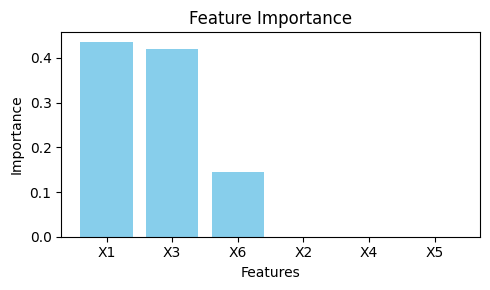

In [ ]:
# Extract feature importances and sort by importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': models['AdaBoost'].feature_importances_
}).sort_values(by='Importance', ascending=False)

# Add percentage column to the DataFrame
print(importance_df[['Feature', 'Importance']])

# Plot
plt.figure(figsize=(5, 3))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

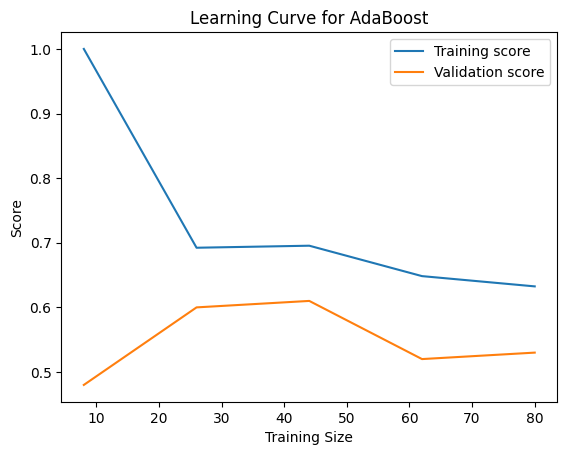

In [ ]:
# Analyze learning curve of train vs valid scores
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(models['AdaBoost'], X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
plt.plot(train_sizes, valid_scores.mean(axis=1), label="Validation score")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.title("Learning Curve for AdaBoost")
plt.legend()
plt.show()

###### **Observations**
As the training line is persistenly higher than the validation score -never converge- it is often a sign of overfitting.
Note that the main reason of this issue might be the size of the dataset. Small datasets are prone to overfitting because the model can easily memorize the training data, resulting in poor generalization to new data.

<a name="d) Improving the Selected Model"></a>
###### **d) Improving the Selected Model**

In [ ]:
# Improving Accuracy of the AdaBoost Model

feature_names = X.columns

# Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

selector = SelectFromModel(
    AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                       n_estimators=70,
                      random_state = 100,
                    learning_rate = 0.01),
    threshold='mean'
)

# Final AdaBoost model with fixed parameters
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=70,
    learning_rate=0.01,
    random_state=100
)

# Define pipeline
pipeline = Pipeline([
   ('feature_selection', selector),
    ('adaboost', adaboost)
])

# Train and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")

# Show selected features
mask = pipeline.named_steps['feature_selection'].get_support()
selected_features = feature_names[mask]
print("Selected Features:")
print(selected_features)

Test Accuracy: 0.7308
Selected Features:
Index(['X1', 'X3', 'X6'], dtype='object')


###### **Observations**
The Accuracy score of the AdaBoost model increased up to 73% after adding Decision Tree as estimator and apply the feature selecttion technique. As a result, questions X1 (Order delivered on time), X3 (Ordered everything I wanted), and X6 (The Add made my ordering preocess easy) were the most importants among all six questions.

<a name="e) Evaluating Predicted Values"></a>
###### <b> e) Evaluating Predicted Values</b>

              precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.67      0.92      0.77        13

    accuracy                           0.73        26
   macro avg       0.77      0.73      0.72        26
weighted avg       0.77      0.73      0.72        26



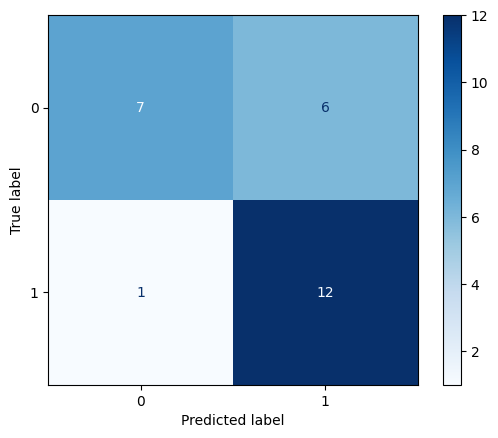

In [ ]:
# -------- Classification Report and Confusion Matrix --------
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

 **Confusion Matrix Interpretation** <br>
       
|       |   0   |   1     |    
 -------|-------|-------- |
|   0   |   TN |    FP    |
|   1   |   FN |    TP    |

Classes: 0 (unhappy) and 1 (happy) customers <br>
**TN (True Negative)**: Correctly predicted unhappy vs. actual unhappy <br>
**FP (False Positive)**: Incorrectly predicted happy vs. actual unhappy <br>
**FN (False Negative)**: Incorrectly predicted unhappy vs. actual happy <br>
**TP (True Positive)**: Correctly predicted happy vs. actual happy <br>

FP might represent a cost for the company, because this can increase the churn rate.

<a name="f) Saving Predicted Values"></a>
###### <b>**f) Saving Predicted Values**</b>

In [ ]:
# Create a DataFrame for saving the results

results_data = pd.DataFrame({
    'true_label': y_test,
    'predicted_label': y_pred
})

# Add predicted probabilities if you generated them
# y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
# results_data['predicted_probability_of_1'] = y_pred_proba

# Save the DataFrame to a CSV file
cspred = '/content/drive/MyDrive/customer_satisfaction_predictions.csv'
results_data.to_csv(cspred, index=False) # index=False prevents writing the DataFrame index as a column

print(f"\nFinal predicted values saved to {cspred}")


Final predicted values saved to /content/drive/MyDrive/customer_satisfaction_predictions.csv


<a name="Final Remarks"></a>
#### <b> 5. Final Remarks</b>
*   The **AdaBoost model** achieved the highest accuracy of 73%, tests like PCA, combining the model with Randomforest of another Boosting method did not increase the final score.
*   Although this model performed better compared to the other models, 73% is still a low score to increase effectively satisfaction of customers.
* Further investigation or more data is required to improve prediction rate.